# Linear regression using statsmodels

In [42]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

## Load data

In [ ]:
data = pd.read_csv('https://online.stat.psu.edu/stat462/sites/onlinecourses.science.psu.edu.stat462/files/data/signdist/index.txt', sep='\t')

data.head()

## EDA

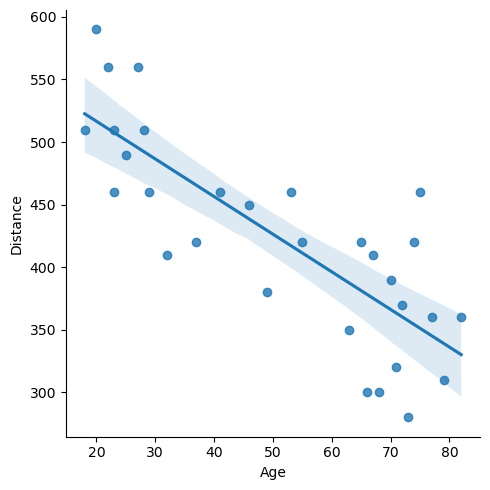

In [29]:
sns.lmplot(data, x='Age', y='Distance')

plt.show()

!Heteroscedasticity might be present

## OLS

In [31]:
model = smf.ols('Distance ~ Age', data=data)

results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               Distance   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     50.21
Date:                Sun, 01 Dec 2024   Prob (F-statistic):           1.04e-07
Time:                        16:58:02   Log-Likelihood:                -158.75
No. Observations:                  30   AIC:                             321.5
Df Residuals:                      28   BIC:                             324.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    576.6819     23.471     24.570      0.0

## Checking for heteroscedasticity

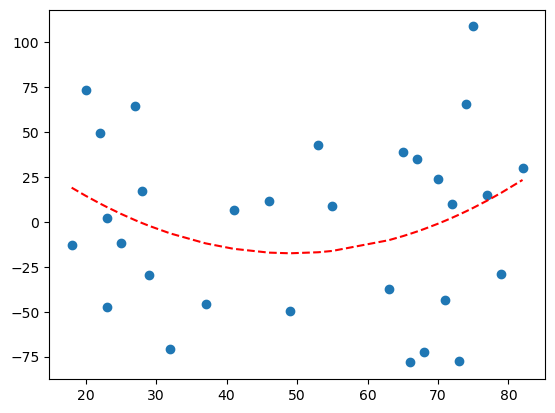

In [61]:
plt.scatter(data.Age, results.resid)

# calculate and plot quadratic trend line
z = np.polyfit(data.Age, results.resid, 2)
p = np.poly1d(z)
plt.plot(data.Age, p(data.Age), '--r')

plt.show()

Variance seems to descrease from 20 to 50 and increase onward (quadratic form). Therefore, White test is preferred to Breusch-Pagan to capture non-linear forms of heteroscedasticity.

In [48]:
exog = data[['Age']]
exog = sm.add_constant(exog)

LM_pval = stats.diagnostic.het_white(results.resid, exog)[1]
print('LM_pval: ', LM_pval)

LM_pval:  0.5481283744759716


Homoscedasticity is not rejected